In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [54]:
df =pd.read_csv("Iris.csv")

In [149]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.shape

(150, 6)

In [57]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
df.iloc[0]


Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

In [59]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [61]:
#iloc[rows,columns]

x= df.iloc[:,1:5]
y =df.iloc[:,-1:]

In [62]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
scaler = StandardScaler()
x =scaler.fit_transform(x)

In [102]:
x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [103]:
 X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [104]:
X_train.shape

(120, 4)

In [105]:
X_test.shape

(30, 4)

In [106]:
model = KNeighborsClassifier(n_neighbors=1)

In [107]:
model.fit(X_train,Y_train)

C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [108]:
pred = model.predict(X_test)
pred[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [109]:

Y_test[0:5]

,Species
79,Iris-versicolor
12,Iris-setosa
33,Iris-setosa
1,Iris-setosa
98,Iris-versicolor


In [110]:
accuracy_score(Y_test,pred)

0.9666666666666667

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[ 9,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  6]], dtype=int64)

In [121]:
Y_test_values = Y_test.values.ravel()  # Convert to 1D array
pred_values = pred.ravel()  # Convert to 1D array

result = pd.DataFrame(data=[Y_test_values, pred_values], index=['Y_test', 'pred']).transpose()

In [122]:
result

,Y_test,pred
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [130]:
import numpy as np

error_rate = []
correct_sum = [] 
for i in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    
    # Convert predictions and true labels to NumPy arrays and flatten them
    pred_array = np.array(pred).flatten()
    Y_test_array = np.array(Y_test).flatten()
    
    # Compare element-wise and sum the correct predictions
    correct = np.sum(pred_array == Y_test_array)
    correct_sum.append(correct)
    
    # Calculate the error rate using element-wise comparison and mean
    error_rate.append(np.mean(pred_array != Y_test_array))


C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [131]:
correct_sum

[29, 27, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]

Minimum error rate: 0.03333333333333333 at K = 1


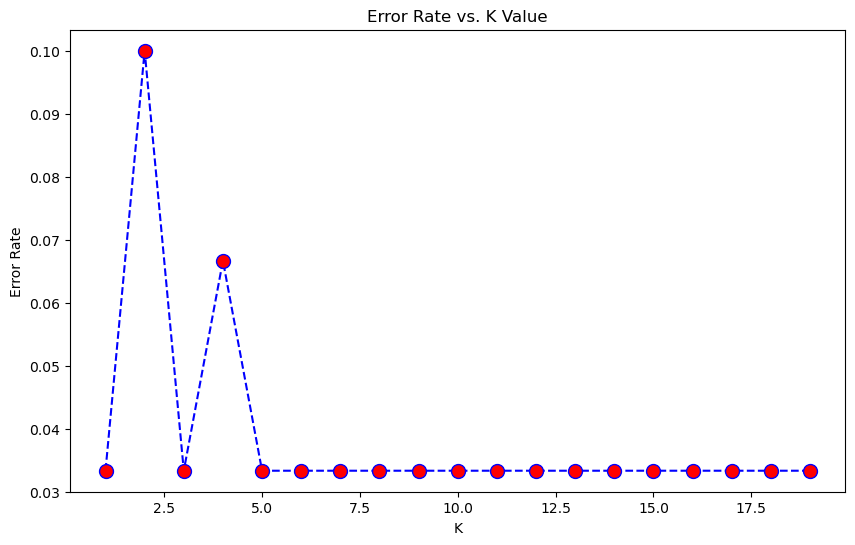

In [143]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

min_error_rate = min(error_rate)
min_error_rate_index = error_rate.index(min_error_rate) + 1  # Adjust for indexing starting from 1
print("Minimum error rate:", min_error_rate, "at K =", min_error_rate_index)


In [148]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
accuracy_score(Y_test,pred)

C:\Users\Lakshan Lahiru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9666666666666667